The command below initializes the object and loads all the calender information into memory. It will only load appointments that start with a prefix of a project_nickname. 

In [1]:
# create the TableMaker object.
from lib.OutlookToPandas import *
outlook = OutlookToPandas()

This is also loading the local Excel file called projects.xlsx with the SAP project information. The project_name is an alias you use as a pre-fix for your Outlook appointment subjects. You can open this and add/remove projects that relate to you. Or you manager can have a master list of all projects here.  Bleow is the list that I use. Notice it matches the format required by your timesheets in SAP. This is for demonstration purposed only. 

In [2]:
outlook.projects_df

,project_nickname,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total
0,PW,714702,P-004001.001,NaN,BWK,1.00,BWK,Pathways for Housing and Buildings,NaN
1,BB-GI,714702,P-002930.002,NaN,BWK,1.00,BWK,Better Evidence for Better Building Code,NaN
2,BB-OEE,714702,P-002930.001,NaN,BWK,1.00,BWK,Better Evidence for Better Bldg Code OEE,NaN
3,ADMIN,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN
4,LEAVE,714702,NaN,NaN,LVE,1.00,LVE,HOUSING AND BUILDINGS,NaN


You can see a sample of the first 5 rows of the data collected from Outlook and merged with project information. This is for demonstation purposes only. 

In [3]:
outlook.tasks.head()

,username,start,project_nickname,subject,duration,body,project_task_number,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total
0,plopez,2019-04-02 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN
1,plopez,2019-04-09 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN
2,plopez,2019-04-16 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN
3,plopez,2019-04-30 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN
4,plopez,2019-05-07 10:00:00,ADMIN,Weekly Stand Up Meeting,30,1 877 413 4785\r\nID 6773700,None,714702,NaN,NaN,ADM,1.00,ADM,HOUSING AND BUILDINGS,NaN


In [12]:
outlook.create_week_sap_report(2019, 29)


,rec_cctr,receiver_wbs_element,rec_order,typ,task_lev,task_com,name,total,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,714702,P-004001.001,,BWK,1.00,BWK,Pathways for Housing and Buildings,,1.0,4.0,0.0,1.5,0.0,0.0,0.0
1,714702,P-002930.002,,BWK,1.00,BWK,Better Evidence for Better Building Code,,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2,714702,P-002930.001,,BWK,1.00,BWK,Better Evidence for Better Bldg Code OEE,,0.0,0.0,0.0,1.5,0.0,0.0,0.0
3,714702,,,ADM,1.00,ADM,HOUSING AND BUILDINGS,,3.0,4.0,7.5,3.0,0.0,0.0,0.0
4,714702,,,LVE,1.00,LVE,HOUSING AND BUILDINGS,,2.0,0.0,0.0,0.0,7.5,0.0,0.0


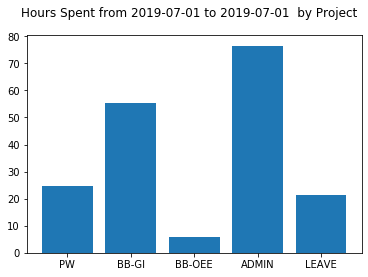

In [5]:
outlook.plot_bar_for_hours_on_projects_in_range(datetime.datetime(2019, 7, 1, 0, 0),datetime.datetime(2019, 8, 1, 0, 0))

In [14]:
range_hours = outlook.get_hours_spent_on_projects_for_date_range(datetime.datetime(2019, 7, 1, 0, 0), datetime.datetime(2019, 8, 5, 0, 0))
import plotly.graph_objects as go
# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=range_hours['project_nickname'], 
            y=range_hours['duration'],
            text=range_hours['duration'],
            textposition='auto',
        )])
fig.update_layout(title_text='(plopez) weeks 27-31 Outlook Project Hours ')
fig.show()    